In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas

In [2]:
url = "avila-tr.csv"
names = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
dataset = pandas.read_csv(url, names=names)
dataset = np.array(dataset.values)

In [3]:
print(dataset[:, 10])
j = 0
dataset_Y = dataset[:, 10]
for y in dataset_Y:
    for i in range(12):
        if(y == class_names[i]):
            dataset_Y[j] = i
            j += 1
dataset[:, 10] = np.array(dataset_Y)
print(dataset[:, 10])

['A' 'A' 'A' ... 'A' 'E' 'X']
[0 0 0 ... 0 4 10]


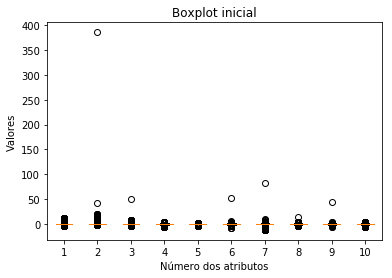

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot inicial')
ax1.set_xlabel("Número dos atributos")
ax1.set_ylabel("Valores")
ax1.boxplot(dataset[:, :10], showfliers=True)
plt.show()

In [5]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_0_train = dataset[:train_size, :10]
X_0_test = dataset[train_size:, :10]
Y_0_train = dataset[:train_size, 10]
Y_0_test = dataset[train_size:, 10]

8344


In [6]:
model_0 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_0.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_0_history = model_0.fit(X_0_train, Y_0_train, epochs=5, validation_split=0.25)

Train on 6258 samples, validate on 2086 samples
Epoch 1/5
6258/6258 [==============================] - 3s 470us/step - loss: 1.2518 - acc: 0.5844 - val_loss: 1.0034 - val_acc: 0.6448
Epoch 2/5
6258/6258 [==============================] - 3s 468us/step - loss: 0.9197 - acc: 0.6740 - val_loss: 0.8302 - val_acc: 0.7018
Epoch 3/5
6258/6258 [==============================] - 3s 425us/step - loss: 0.7966 - acc: 0.7167 - val_loss: 0.7413 - val_acc: 0.7267
Epoch 4/5
6258/6258 [==============================] - 3s 455us/step - loss: 0.7092 - acc: 0.7360 - val_loss: 0.7782 - val_acc: 0.7220
Epoch 5/5
6258/6258 [==============================] - 3s 445us/step - loss: 0.6551 - acc: 0.7555 - val_loss: 0.7072 - val_acc: 0.7330


In [7]:
test_0_loss, test_0_acc = model_0.evaluate(X_0_test, Y_0_test)

print('Acurácia do teste:', test_0_acc)

2086/2086 [==============================] - 0s 126us/step
Acurácia do teste: 0.7425695109687396


In [8]:
mean = np.mean(dataset[:, :10], axis=0)
sd = np.std(dataset[:, :10], axis=0, dtype=np.float64)
for i in range(10):
    dataset = [x for x in dataset if (x[i] > mean[i] - 2 * sd[i])]
    dataset = [x for x in dataset if (x[i] < mean[i] + 2 * sd[i])]
    dataset = np.array(dataset)
    print(dataset.shape)

(9898, 11)
(9878, 11)
(9160, 11)
(8919, 11)
(8889, 11)
(8646, 11)
(8462, 11)
(8195, 11)
(8077, 11)
(7995, 11)


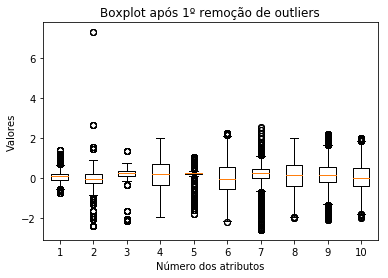

In [9]:
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot após 1º remoção de outliers')
ax2.set_xlabel("Número dos atributos")
ax2.set_ylabel("Valores")
ax2.boxplot(dataset[:, :10], showfliers=True)
plt.show()

In [10]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_1_train = dataset[:train_size, :10]
X_1_test = dataset[train_size:, :10]
Y_1_train = dataset[:train_size, 10]
Y_1_test = dataset[train_size:, 10]

6396


In [11]:
model_1 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1_history = model_1.fit(X_1_train, Y_1_train, epochs=5, validation_split=0.25)

Train on 4797 samples, validate on 1599 samples
Epoch 1/5
4797/4797 [==============================] - 2s 496us/step - loss: 1.0939 - acc: 0.6164 - val_loss: 0.8929 - val_acc: 0.6542
Epoch 2/5
4797/4797 [==============================] - 2s 477us/step - loss: 0.7856 - acc: 0.6940 - val_loss: 0.7336 - val_acc: 0.7148
Epoch 3/5
4797/4797 [==============================] - 2s 454us/step - loss: 0.6797 - acc: 0.7277 - val_loss: 0.6995 - val_acc: 0.7242
Epoch 4/5
4797/4797 [==============================] - 2s 429us/step - loss: 0.6201 - acc: 0.7467 - val_loss: 0.6704 - val_acc: 0.7280
Epoch 5/5
4797/4797 [==============================] - 2s 430us/step - loss: 0.5765 - acc: 0.7640 - val_loss: 0.6455 - val_acc: 0.7298


In [12]:
test_1_loss, test_1_acc = model_1.evaluate(X_1_test, Y_1_test)

print('Acurácia do teste:', test_1_acc)

1599/1599 [==============================] - 0s 114us/step
Acurácia do teste: 0.7492182615624882


In [13]:
mean = np.mean(dataset[:, :10], axis=0)
sd = np.std(dataset[:, :10], axis=0, dtype=np.float64)
for i in range(10):
    dataset = [x for x in dataset if (x[i] > mean[i] - 2 * sd[i])]
    dataset = [x for x in dataset if (x[i] < mean[i] + 2 * sd[i])]
    dataset = np.array(dataset)
    print(dataset.shape)

(7559, 11)
(7309, 11)
(7211, 11)
(6919, 11)
(6510, 11)
(6254, 11)
(5833, 11)
(5616, 11)
(5429, 11)
(5377, 11)


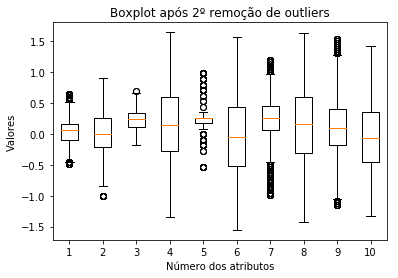

In [14]:
fig3, ax3 = plt.subplots()
ax3.set_title('Boxplot após 2º remoção de outliers')
ax3.set_xlabel("Número dos atributos")
ax3.set_ylabel("Valores")
ax3.boxplot(dataset[:, :10], showfliers=True)
plt.show()

In [15]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_2_train = dataset[:train_size, :10]
X_2_test = dataset[train_size:, :10]
Y_2_train = dataset[:train_size, 10]
Y_2_test = dataset[train_size:, 10]

4301


In [16]:
model_2 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2_history = model_2.fit(X_2_train, Y_2_train, epochs=5, validation_split=0.25)

Train on 3225 samples, validate on 1076 samples
Epoch 1/5
3225/3225 [==============================] - 2s 526us/step - loss: 1.2195 - acc: 0.5740 - val_loss: 0.9724 - val_acc: 0.6394
Epoch 2/5
3225/3225 [==============================] - 2s 468us/step - loss: 0.8583 - acc: 0.6682 - val_loss: 0.8125 - val_acc: 0.6794
Epoch 3/5
3225/3225 [==============================] - 1s 460us/step - loss: 0.7619 - acc: 0.6952 - val_loss: 0.7502 - val_acc: 0.6924
Epoch 4/5
3225/3225 [==============================] - 2s 471us/step - loss: 0.7010 - acc: 0.7095 - val_loss: 0.7573 - val_acc: 0.6924
Epoch 5/5
3225/3225 [==============================] - 2s 481us/step - loss: 0.6636 - acc: 0.7231 - val_loss: 0.6687 - val_acc: 0.7165


In [17]:
test_2_loss, test_2_acc = model_2.evaluate(X_2_test, Y_2_test)

print('Acurácia do teste:', test_2_acc)

1076/1076 [==============================] - 0s 125us/step
Acurácia do teste: 0.7518587365026368


In [18]:
mean = np.mean(dataset[:, :10], axis=0)
sd = np.std(dataset[:, :10], axis=0, dtype=np.float64)
for i in range(10):
    dataset = [x for x in dataset if (x[i] > mean[i] - 2 * sd[i])]
    dataset = [x for x in dataset if (x[i] < mean[i] + 2 * sd[i])]
    dataset = np.array(dataset)
    print(dataset.shape)

(5123, 11)
(4921, 11)
(4787, 11)
(4598, 11)
(4508, 11)
(4349, 11)
(4181, 11)
(4033, 11)
(3848, 11)
(3784, 11)


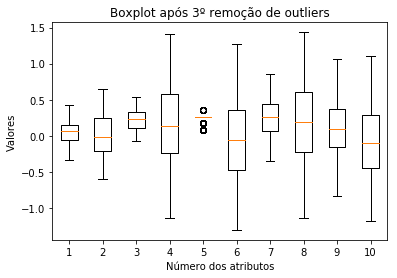

In [19]:
fig4, ax4 = plt.subplots()
ax4.set_title('Boxplot após 3º remoção de outliers')
ax4.set_xlabel("Número dos atributos")
ax4.set_ylabel("Valores")
ax4.boxplot(dataset[:, :10], showfliers=True)
plt.show()

In [20]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_3_train = dataset[:train_size, :10]
X_3_test = dataset[train_size:, :10]
Y_3_train = dataset[:train_size, 10]
Y_3_test = dataset[train_size:, 10]

3027


In [21]:
model_3 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_3_history = model_3.fit(X_3_train, Y_3_train, epochs=5, validation_split=0.25)

Train on 2270 samples, validate on 757 samples
Epoch 1/5
2270/2270 [==============================] - 1s 629us/step - loss: 1.1518 - acc: 0.5881 - val_loss: 0.8818 - val_acc: 0.6526
Epoch 2/5
2270/2270 [==============================] - 1s 480us/step - loss: 0.8196 - acc: 0.6634 - val_loss: 0.7795 - val_acc: 0.6975
Epoch 3/5
2270/2270 [==============================] - 1s 472us/step - loss: 0.7645 - acc: 0.6850 - val_loss: 0.7198 - val_acc: 0.7094
Epoch 4/5
2270/2270 [==============================] - 1s 453us/step - loss: 0.6785 - acc: 0.7185 - val_loss: 0.6990 - val_acc: 0.7067
Epoch 5/5
2270/2270 [==============================] - 1s 448us/step - loss: 0.6452 - acc: 0.7291 - val_loss: 0.6497 - val_acc: 0.7186


In [22]:
test_3_loss, test_3_acc = model_3.evaluate(X_3_test, Y_3_test)

print('Acurácia do teste:', test_3_acc)

757/757 [==============================] - 0s 120us/step
Acurácia do teste: 0.7357992077125741


In [23]:
mean = np.mean(dataset[:, :10], axis=0)
sd = np.std(dataset[:, :10], axis=0, dtype=np.float64)
for i in range(10):
    dataset = [x for x in dataset if (x[i] > mean[i] - 2 * sd[i])]
    dataset = [x for x in dataset if (x[i] < mean[i] + 2 * sd[i])]
    dataset = np.array(dataset)
    print(dataset.shape)

(3620, 11)
(3577, 11)
(3540, 11)
(3404, 11)
(3283, 11)
(3181, 11)
(3047, 11)
(2950, 11)
(2810, 11)
(2764, 11)


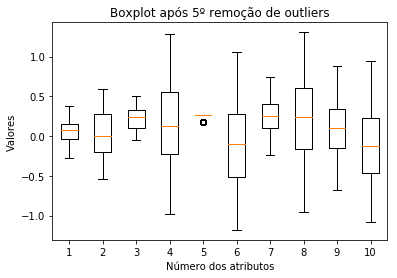

In [24]:
fig5, ax5 = plt.subplots()
ax5.set_title('Boxplot após 5º remoção de outliers')
ax5.set_xlabel("Número dos atributos")
ax5.set_ylabel("Valores")
ax5.boxplot(dataset[:, :10], showfliers=True)
plt.show()

In [25]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_4_train = dataset[:train_size, :10]
X_4_test = dataset[train_size:, :10]
Y_4_train = dataset[:train_size, 10]
Y_4_test = dataset[train_size:, 10]

2211


In [26]:
model_4 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_4.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_4_history = model_4.fit(X_4_train, Y_4_train, epochs=5, validation_split=0.25)

Train on 1658 samples, validate on 553 samples
Epoch 1/5
1658/1658 [==============================] - 1s 679us/step - loss: 1.2272 - acc: 0.5736 - val_loss: 0.9654 - val_acc: 0.6347
Epoch 2/5
1658/1658 [==============================] - 1s 497us/step - loss: 0.8939 - acc: 0.6267 - val_loss: 0.8490 - val_acc: 0.6564
Epoch 3/5
1658/1658 [==============================] - 1s 491us/step - loss: 0.7996 - acc: 0.6761 - val_loss: 0.7715 - val_acc: 0.6890
Epoch 4/5
1658/1658 [==============================] - 1s 518us/step - loss: 0.7408 - acc: 0.6888 - val_loss: 0.7368 - val_acc: 0.6962
Epoch 5/5
1658/1658 [==============================] - 1s 527us/step - loss: 0.7004 - acc: 0.7135 - val_loss: 0.7286 - val_acc: 0.7125


In [27]:
test_4_loss, test_4_acc = model_4.evaluate(X_4_test, Y_4_test)

print('Acurácia do teste:', test_4_acc)

553/553 [==============================] - 0s 162us/step
Acurácia do teste: 0.6925858952253249


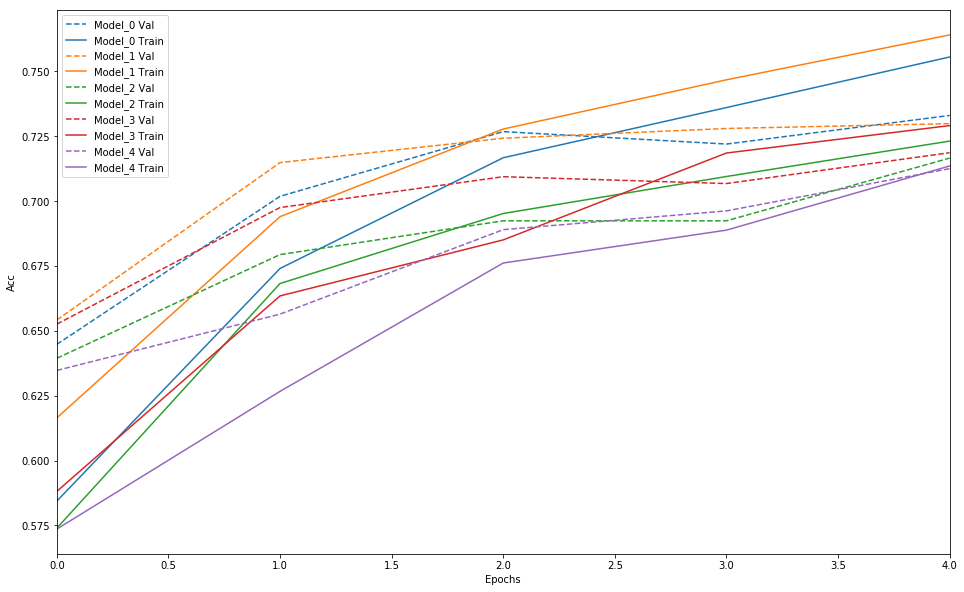

In [93]:
def plot_history(histories, key='acc'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('model_0', model_0_history),
              ('model_1', model_1_history),
              ('model_2', model_2_history),
              ('model_3', model_3_history),
              ('model_4', model_4_history)])

In [29]:
plot_test = [test_0_acc, test_1_acc, test_2_acc, test_3_acc, test_4_acc]

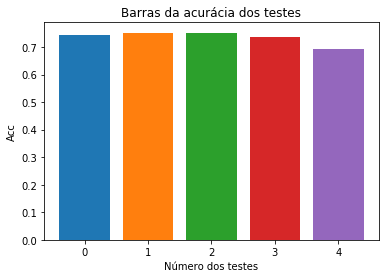

In [88]:
fig6, ax6 = plt.subplots()
ax6.set_title('Barras da acurácia dos testes')
ax6.set_xlabel("Número dos testes")
ax6.set_ylabel("Acc")
ax6.bar(range(5), plot_test, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.show()

In [99]:
predictions = model_4.predict(X_4_test)

In [100]:
def plot_value_array(i, predictions_array, true_Y):
    predictions_array, true_Y = predictions_array[i], true_Y[i]
    plt.grid(False)
    plt.xticks(range(12))
    plt.yticks([])
    thisplot = plt.bar(range(12), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_Y].set_color('blue')

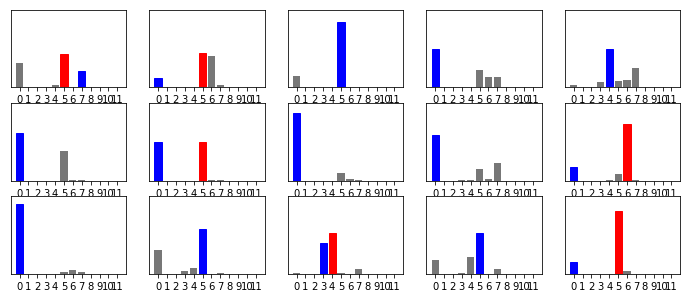

In [101]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(2*num_cols, num_rows, i+1)
    plot_value_array(i, predictions, Y_4_test)

In [114]:
test = ([1,2,3], [4,5,6])
test = np.array(test)
part1 = test[:, 0:1]
part2 = test[:, 2]

part1.append(part2)
#test = dataset[:, (0:1, 3:10)]
print(test.shape)
dataset = np.array(dataset)
print(dataset.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'append'